<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/main/plates_identify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,503 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


辨識結果:
ARE7781


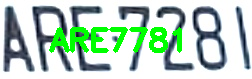

辨識結果:
ARE728


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


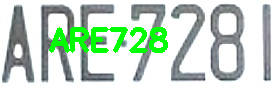

辨識結果:
BNT6502


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


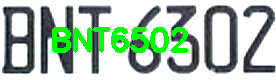

辨識結果:
BKY7610


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


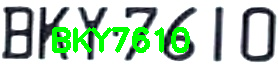

辨識結果:
BKY7610


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


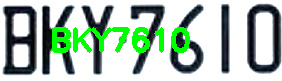

辨識結果:
BNT6302


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


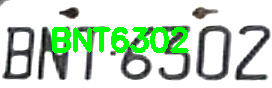

辨識結果:
ATC9706


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


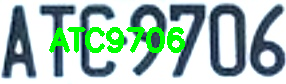

辨識結果:
ARE728


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


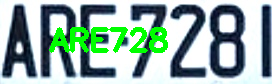

辨識結果:
ATC9706


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


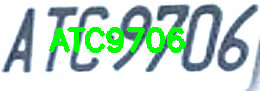

辨識結果:
ARE728


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


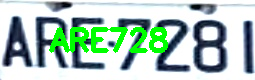

辨識結果:
ARE7281


<ipython-input-2-9177593d681f>:96: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)


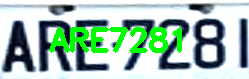

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import PIL
import glob
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install pillow
import pytesseract
#照片路徑
files=glob.glob('/content/drive/MyDrive/small_plates/*.jpg')
def photo_resize(img,target_width,target_height):
  # 調整圖片大小
  re_img=cv2.resize(img, (target_width, target_height))
  return re_img
#調整亮度與對比度
def adjusted(img,x,y):
  alpha = x
  beta = y

  adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

  return adjusted_image

def Sobel(img):
  Sobelx=cv2.Sobel(img,cv2.CV_32F,1,0)
  Sobelx=cv2.convertScaleAbs(Sobelx)
  return Sobelx

def Gussian(img):
  kernel_size = (5, 5)  # 高斯和大小 通常奇數
  sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算
  # 高斯濾波器
  blurred_img = cv2.GaussianBlur(img, kernel_size, sigma_x)
  return blurred_img
def threshold(img):
  thr, binary = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
  return binary
def contours(img):
  contours1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
  contours = contours1[0]   #取得輪廓
  # cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
  letters=[]
  for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    if 15<h<90: #要改的參數!!!10<h<100
      letters.append(contour)
  # cv2.drawContours(contours_img, letters, -1, (255, 0, 0), 2)
  # cv2_imshow(contours_img)
  #找出最小x跟最大x
  min_x =float('inf')#正無窮
  max_x =0
  for letter in letters:
    for point in letter:
      x=point[0][0]
      min_x=min(min_x,x)
      max_x=max(max_x,x)
  return min_x,max_x
#image[y:h,x:w]
def cropped(img,x,y,h,w):
  cropped_img=img[y:h,x:w]

  return cropped_img

def erope(img):
  kernel=np.ones((3, 3),np.uint8)
  ero=cv2.erode(img,kernel,iterations=1)
  return ero

def dilate(img):
  kernel=np.ones((2, 5),np.uint8)
  dilation=cv2.dilate(img,kernel,iterations=8)
  return dilation

def findcontour(img):
  contours1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
  contours = contours1[0]   #取得輪廓
  points=None
  min_contour_length = 2500

  # 遍歷所有輪廓
  for contour in contours:
      # 計算輪廓的面積
      area = cv2.contourArea(contour)

      # 如果輪廓的面積大於2500，繪製最小外接矩形
      if area >= min_contour_length:
          # 計算輪廓的最小外接矩形
          rect = cv2.minAreaRect(contour)
          angle=rect[2]
          points = cv2.boxPoints(rect)
          points = np.int0(points)
          break

  if points is not None:
    if angle>=0:
      sorted_points = sorted(points, key=lambda x: x[0])
      bottom_left=sorted_points[0]
      top_left=sorted_points[1]
      bottom_right=sorted_points[2]
      top_right=sorted_points[3]

      return bottom_left,top_left,bottom_right,top_right
    else:
      sorted_points = sorted(points, key=lambda x: x[0])
      top_left=sorted_points[0]
      bottom_left=sorted_points[1]
      top_right=sorted_points[2]
      bottom_right=sorted_points[3]

      return bottom_left,top_left,bottom_right,top_right
  else:
    return 0,0,0,0

def affine(img,bottom_left,top_left,bottom_right,top_right):
  p1 = np.float32([(top_left),(top_right),(bottom_right)])
  p2 = np.float32([[top_left[0],top_right[1]],(top_right),(bottom_right)])
  M = cv2.getAffineTransform(p1, p2)

  h,w=adj_img.shape[:2]

  output = cv2.warpAffine(adj_img, M,(w,h))

  x=0
  y=min(top_right[1],bottom_right[1])
  h=abs(bottom_right[1]-top_right[1])

  output=output[y-5:y+h,x:x+w]
  # output=adjusted(output,-1.5,15)
  # output=adjusted(output,-1.3,12)
  output=adjusted(output,-1.5,15)
  if output is not None:
    # output = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
    # thr, output = cv2.threshold(output,127, 255, cv2.THRESH_BINARY)
    cv2.imwrite('output.jpg',output)
  else:
    print('None')
    pass

def tesseracttt(img):

  config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789. --oem 3 --psm 6'
  text = pytesseract.image_to_string(img,lang='eng',config=config)
  if len(text) ==1:
    print('辨識失敗')
  else:
    clean_text = text.strip()#去除兩端不可見字符
    print('辨識結果:\n{}'.format(clean_text))
    img=cv2.imread(img)
    cv2.putText(img, clean_text, (int(50), int(50)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    cv2_imshow(img)
for file in files:
  img=cv2.imread(file)
  #調整圖片大小
  # img=photo_resize(img,300,136)
  img=photo_resize(img,300,136)
  #調整圖片亮度與對比度
  adj_img=adjusted(img,-1.5,15)
  #灰階
  gray_img = cv2.cvtColor(adj_img,cv2.COLOR_BGR2GRAY)
  #索伯
  Sobelx=Sobel(gray_img)
  #高斯模糊
  blur_img=Gussian(Sobelx)
  #二值化
  binary=threshold(blur_img)
  # cv2_imshow(binary)
  # plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
  # plt.axis('off')
  # plt.show()
  #找出輪廓
  min_x,max_x=contours(binary)
  #車牌框裁切
  cropped_img=cropped(binary,min_x,0,binary.shape[0],max_x)
  #侵蝕
  ero_img=erope(cropped_img)
  #膨脹
  dilate_img=dilate(ero_img)
  # cv2_imshow(dilate_img)
  #找出最小四邊形輪廓
  bottom_left,top_left,bottom_right,top_right=findcontour(dilate_img)
  # out_img=tesseract(output)

  adj_img=cropped(adj_img,min_x,0,img.shape[0],max_x)
  # cv2_imshow(adj_img)
  #訪設變換
  affine(adj_img,bottom_left,top_left,bottom_right,top_right)
  # cv2.imwrite('output.jpg',output)
  #字元辨識
  tesseracttt('output.jpg')
